1. Introduction
2. Data preparation
- Load data
- Check for null and missing values
- Normalization
- Reshape
- Label encoding
- Split training and valdiation set
3. CNN
- Define the model
- Set the optimizer and annealer
- Data augmentation
4. Evaluate the model 
- Training and validation curves
- Confusion matrix
5. Prediction and submition
- Predict and Submit results

##### _________________________________________________________________________________________________________________

# Introduction


- What is CNN?
    - Convolutional Neural Networks (CNNs) are a class of deep learning models primarily used for processing structured grid data, such as images. 
- Different Layers
    - Convolution Layers:
    Perform feature extraction using convolution operations.Use filters (kernels) to detect patterns like edges, textures, or shapes.Applies kernels to the input data to produce feature maps.
        - Stride: The step size of the kernel as it moves across the input. Larger strides reduce the output size.
        - Padding: Adding borders around the input to control the size of the output (e.g., "same" padding keeps the output size equal to the input size)
        
    - Kernels (Filters):
    Small, trainable matrices (e.g., 3x3, 5x5) used to extract features from the input data via convolution operations.Slide across the input (image or feature map), performing element-wise multiplication and summing up the results to produce a feature map.
        - Detect low-level features (e.g., edges, corners) in early layers.
        - Capture complex patterns (e.g., shapes, objects) in deeper layers.
    
    - Pooling Layers:
    Reduce the spatial dimensions of feature maps (down-sampling).Common types include max pooling and average pooling.
        - Types:
        - Max Pooling: Takes the maximum value in each region of the feature map.
        - Average Pooling: Computes the average of values in each region.
    Reduce computational complexity.
    Retain important features while discarding less relevant details.
    Make the network invariant to small translations in the input.
    
    - Activation Functions:
    Introduce non-linearity to the model, enabling it to learn complex patterns
        - Common Types:
        - ReLU (Rectified Linear Unit): f(x) = max(0, x); most commonly used due to simplicity and effectiveness.
        - Sigmoid: Outputs values between 0 and 1; used in binary classification.
        - Tanh: Outputs values between -1 and 1; used in regression tasks.
    Why Activation Functions?
    Without them, the CNN would behave like a linear system and fail to model complex relationships.
    
    
    - Fully Connected Layers:
    Act as the final layers for classification or regression tasks.Flatten the feature maps into a vector.
        - Purpose:
        - Combine features learned by convolutional layers for final predictions.
        - Typically used at the end of the CNN for classification or regression.
    
    - Dropout Layers:
    Definition: Randomly disable a fraction of neurons during training.
        - Purpose:
        - Prevent overfitting by introducing regularization.
        - Improve model generalization.
        
     - Batch Normalization:
    Definition: Normalizes the inputs to a layer by adjusting and scaling activations.
        - Purpose:
        - Stabilize and accelerate training.
        - Reduce internal covariate shift.
        
    - Output Layer:
    Produces the final prediction.
    Uses a suitable activation function:
        - Softmax: For multi-class classification.
        - Sigmoid: For binary classification.
        - Linear: For regression.

- Key Aspects
    - Loss Function:
    Quantifies the difference between predicted and actual outputs.
    Examples:
        - Categorical Cross-Entropy: For classification tasks.
        - Mean Squared Error (MSE): For regression tasks.
    
    - Optimizer:
    Updates model weights to minimize the loss function.
    Common Choices:
        - SGD (Stochastic Gradient Descent).
        - Adam: Adaptive learning rate optimizer.
    
    - Hyperparameters:
    Parameters set before training:
        - Kernel size, stride, padding.
        - Number of kernels (filters).
        - Pooling window size.
        - Learning rate, batch size, epochs.




- Advantage
    - CNNs are highly effective in tasks that involve spatial or hierarchical data, especially images and grid-structured data. CNNs are widely used in computer vision and have significantly advanced areas like facial recognition, autonomous vehicles, and robotics.
    
- Applications
    - Image and video recognition
    - Object detection
    - Natural Language Processing (e.g., text classification)
    - Medical image analysis
    
- Where to use?
    - Image and Video Analysis:
    Tasks: Image classification, object detection, semantic segmentation, face recognition, and video analysis.
    Why: CNNs can learn spatial hierarchies and extract patterns like edges, shapes, and textures.
    - Time-Series Data (when spatial structure exists):
    Tasks: Financial data analysis or seismic activity detection (e.g., spectrograms).
    Why: CNNs can capture local patterns in 2D representations of time-series data
    - Natural Language Processing (NLP) (with embeddings):
    Tasks: Text classification, sentiment analysis.
    Why: CNNs can detect n-gram features in word embeddings.
    
- Where not to use?
    - Tabular Data (Simpler):
    Tasks: Predicting outcomes from spreadsheets (e.g., customer churn, credit scoring).
    Why Not: Fully Connected Neural Networks (FCNNs), Decision Trees, or Gradient Boosting algorithms often perform better and are simpler to use for tabular data.
    - Text Data Without Spatial Structure:
    Tasks: Long-form text analysis, sequence generation.
    Why Not: Recurrent Neural Networks (RNNs), Transformers, or LSTMs are better suited for sequential relationships in text.

- Use CNNs for problems with spatial hierarchies, large datasets, and image/video tasks.
- Avoid CNNs for non-grid data, small datasets, or when interpretability or simpler models can achieve comparable results


In [1]:
"""
## Download MNIST dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)
"""

'\n## Download MNIST dataset\n\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("hojjatk/mnist-dataset")\n\nprint("Path to dataset files:", path)\n'

In [37]:
## Import Libraries
import numpy as np
import idx2numpy
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
# Load the data
train = pd.read_csv("./Data/MNIST/train.csv")
test = pd.read_csv("./Data/MNIST/test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
# del train 

In [9]:
# Some examples
# g = plt.imshow(X_train[0][:,:,0])

# EDA

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

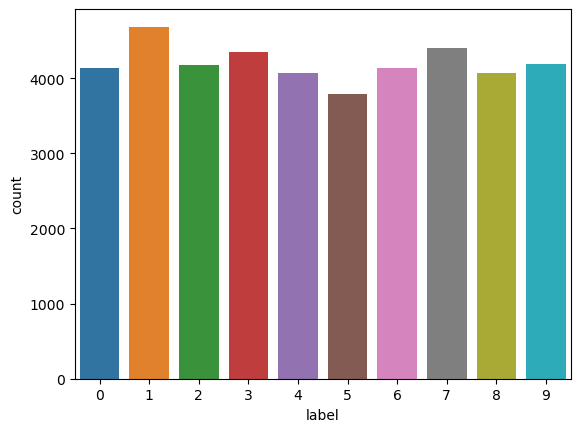

In [10]:
g = sns.countplot(train, x="label")
Y_train.value_counts()

In [11]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# Data Preparation

In [13]:
X_train = X_train / 255.0
test = test / 255.0

In [14]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [15]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [16]:
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

# CNN

In [17]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [20]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, weight_decay=0.0)

In [21]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [26]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [27]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [28]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_19708\923181679.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


439/439 - 25s - loss: 0.1285 - accuracy: 0.9630 - val_loss: 0.0399 - val_accuracy: 0.9864 - lr: 0.0010 - 25s/epoch - 56ms/step
Epoch 2/30


439/439 - 24s - loss: 0.0939 - accuracy: 0.9719 - val_loss: 0.0513 - val_accuracy: 0.9821 - lr: 0.0010 - 24s/epoch - 55ms/step
Epoch 3/30


439/439 - 24s - loss: 0.0793 - accuracy: 0.9769 - val_loss: 0.0304 - val_accuracy: 0.9910 - lr: 0.0010 - 24s/epoch - 54ms/step
Epoch 4/30


439/439 - 24s - loss: 0.0679 - accuracy: 0.9792 - val_loss: 0.0331 - val_accuracy: 0.9921 - lr: 0.0010 - 24s/epoch - 55ms/step
Epoch 5/30


439/439 - 24s - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0198 - val_accuracy: 0.9938 - lr: 0.0010 - 24s/epoch - 55ms/step
Epoch 6/30


439/439 - 25s - loss: 0.0583 - accuracy: 0.9830 - val_loss: 0.0244 - val_accuracy: 0.9933 - lr: 0.0010 - 25s/epoch - 57ms/step
Epoch 7/30


439/439 - 26s - loss: 0.0526 - accuracy: 0.9845 - val_loss: 0.0247 - val_accuracy: 0.9936 - lr: 0.0010 - 26s/epoch - 60ms/step
Epoch 8/30


439/439 - 27s - loss: 0.0539 - accuracy: 0.9845 - val_loss: 0.0259 - val_accuracy: 0.9929 - lr: 0.0010 - 27s/epoch - 61ms/step
Epoch 9/30


439/439 - 28s - loss: 0.0520 - accuracy: 0.9855 - val_loss: 0.0259 - val_accuracy: 0.9919 - lr: 0.0010 - 28s/epoch - 63ms/step
Epoch 10/30


439/439 - 28s - loss: 0.0515 - accuracy: 0.9848 - val_loss: 0.0323 - val_accuracy: 0.9914 - lr: 0.0010 - 28s/epoch - 64ms/step
Epoch 11/30


439/439 - 28s - loss: 0.0521 - accuracy: 0.9854 - val_loss: 0.0224 - val_accuracy: 0.9924 - lr: 0.0010 - 28s/epoch - 64ms/step
Epoch 12/30


439/439 - 28s - loss: 0.0504 - accuracy: 0.9855 - val_loss: 0.0263 - val_accuracy: 0.9919 - lr: 0.0010 - 28s/epoch - 65ms/step
Epoch 13/30


439/439 - 29s - loss: 0.0524 - accuracy: 0.9857 - val_loss: 0.0252 - val_accuracy: 0.9929 - lr: 0.0010 - 29s/epoch - 65ms/step
Epoch 14/30


439/439 - 29s - loss: 0.0497 - accuracy: 0.9863 - val_loss: 0.0305 - val_accuracy: 0.9924 - lr: 0.0010 - 29s/epoch - 66ms/step
Epoch 15/30


439/439 - 29s - loss: 0.0520 - accuracy: 0.9851 - val_loss: 0.0332 - val_accuracy: 0.9933 - lr: 0.0010 - 29s/epoch - 66ms/step
Epoch 16/30


439/439 - 29s - loss: 0.0543 - accuracy: 0.9848 - val_loss: 0.0269 - val_accuracy: 0.9940 - lr: 0.0010 - 29s/epoch - 66ms/step
Epoch 17/30


439/439 - 29s - loss: 0.0528 - accuracy: 0.9861 - val_loss: 0.0214 - val_accuracy: 0.9938 - lr: 0.0010 - 29s/epoch - 67ms/step
Epoch 18/30


439/439 - 29s - loss: 0.0535 - accuracy: 0.9858 - val_loss: 0.0351 - val_accuracy: 0.9914 - lr: 0.0010 - 29s/epoch - 67ms/step
Epoch 19/30


439/439 - 29s - loss: 0.0525 - accuracy: 0.9859 - val_loss: 0.0224 - val_accuracy: 0.9943 - lr: 0.0010 - 29s/epoch - 67ms/step
Epoch 20/30


439/439 - 30s - loss: 0.0538 - accuracy: 0.9861 - val_loss: 0.0363 - val_accuracy: 0.9907 - lr: 0.0010 - 30s/epoch - 69ms/step
Epoch 21/30


439/439 - 31s - loss: 0.0540 - accuracy: 0.9855 - val_loss: 0.0292 - val_accuracy: 0.9929 - lr: 0.0010 - 31s/epoch - 70ms/step
Epoch 22/30


439/439 - 31s - loss: 0.0546 - accuracy: 0.9857 - val_loss: 0.0284 - val_accuracy: 0.9931 - lr: 0.0010 - 31s/epoch - 72ms/step
Epoch 23/30


439/439 - 31s - loss: 0.0581 - accuracy: 0.9850 - val_loss: 0.0250 - val_accuracy: 0.9921 - lr: 0.0010 - 31s/epoch - 70ms/step
Epoch 24/30


439/439 - 31s - loss: 0.0563 - accuracy: 0.9853 - val_loss: 0.0315 - val_accuracy: 0.9929 - lr: 0.0010 - 31s/epoch - 70ms/step
Epoch 25/30


439/439 - 31s - loss: 0.0568 - accuracy: 0.9857 - val_loss: 0.0352 - val_accuracy: 0.9926 - lr: 0.0010 - 31s/epoch - 70ms/step
Epoch 26/30


439/439 - 31s - loss: 0.0615 - accuracy: 0.9848 - val_loss: 0.0372 - val_accuracy: 0.9931 - lr: 0.0010 - 31s/epoch - 71ms/step
Epoch 27/30


439/439 - 31s - loss: 0.0609 - accuracy: 0.9854 - val_loss: 0.0294 - val_accuracy: 0.9926 - lr: 0.0010 - 31s/epoch - 71ms/step
Epoch 28/30


439/439 - 31s - loss: 0.0578 - accuracy: 0.9855 - val_loss: 0.0276 - val_accuracy: 0.9948 - lr: 0.0010 - 31s/epoch - 71ms/step
Epoch 29/30


439/439 - 32s - loss: 0.0628 - accuracy: 0.9848 - val_loss: 0.0372 - val_accuracy: 0.9926 - lr: 0.0010 - 32s/epoch - 74ms/step
Epoch 30/30


439/439 - 31s - loss: 0.0664 - accuracy: 0.9840 - val_loss: 0.0300 - val_accuracy: 0.9929 - lr: 0.0010 - 31s/epoch - 71ms/step


# Model Evaluation

In [ ]:
## Model Evaluation for CNN

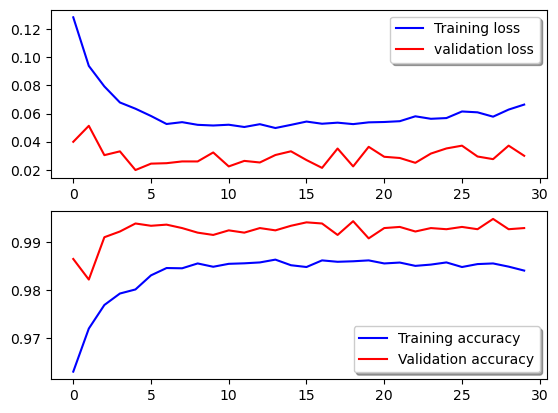

In [35]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

132/132 [==============================] - 2s 12ms/step


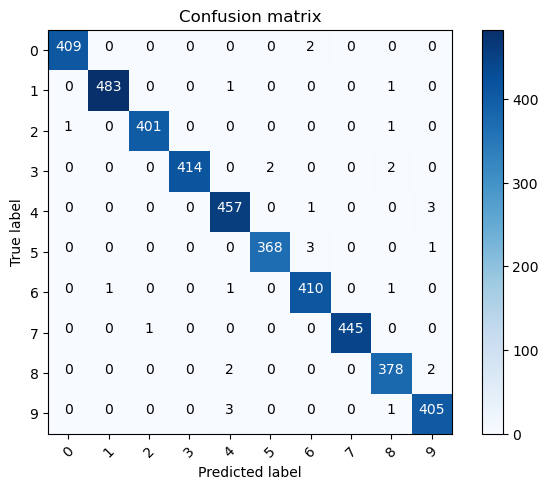

In [38]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

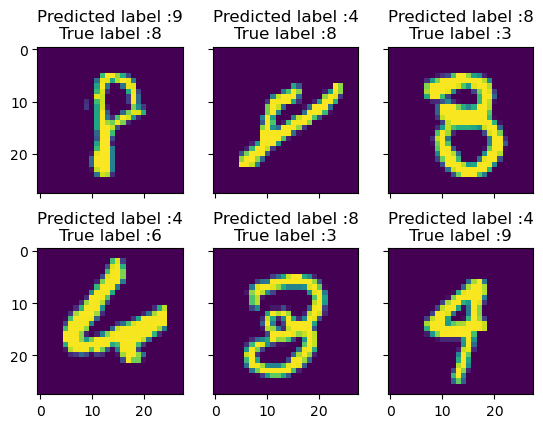

In [39]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [40]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 9s 10ms/step
